<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/4(new%ED%99%9C%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터셋을 활용한 분류예측 모델 + 시각화

In [127]:
# 필요한 라이브러리 불러오기
import tensorflow as tf                              # 딥러닝을 위한 TensorFlow 라이브러리
import matplotlib.pyplot as plt                      # 데이터 시각화용 matplotlib
import numpy as np                                   # 배열 및 수치 계산을 위한 numpy (사용하지 않는 경우 이 줄은 생략 가능)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau


# 데이터 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()     # MNIST 데이터셋을 내려받아 훈련 및 테스트 세트로 분할


In [128]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


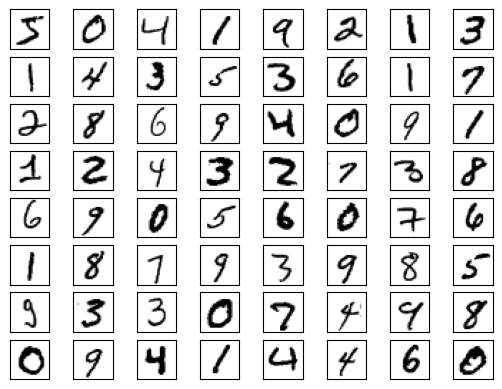

In [129]:
# 분류에 사용할 클래스 이름 설정
class_names = ['0','1','2','3','4','5','6','7','8','9']

# 훈련 데이터 이미지 일부를 출력 (8x8 그리드로 64개)
for i in range(64):
    plt.subplot(8, 8, i+1)                           # 5x5 그리드로 이미지 출력
    plt.grid(False)                                  # 그리드를 비활성화하여 시각적으로 깔끔하게 표시
    plt.xticks([])                                   # x축 눈금 제거
    plt.yticks([])                                   # y축 눈금 제거
    plt.imshow(x_train[i], cmap=plt.cm.binary)       # 흑백 이미지로 표시 (binary 색상맵)
plt.show()

In [130]:
# 데이터 불러오기 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()     # MNIST 데이터셋을 내려받아 훈련 및 테스트 세트로 분할
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0             # 이미지 데이터를 28x28x1 모양으로 변경하고 0-1 사이 값으로 정규화
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)  # 레이블을 원-핫 인코딩 (0부터 9까지 10개 클래스)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [131]:
# # 데이터 증강
# datagen = ImageDataGenerator(
#     rotation_range=10,       # 이미지를 랜덤하게 회전 (최대 10도)
#     zoom_range=0.1,          # 이미지를 랜덤하게 확대/축소 (최대 10%)
#     width_shift_range=0.1,   # 이미지를 랜덤하게 좌우로 이동
#     height_shift_range=0.1   # 이미지를 랜덤하게 상하로 이동
# )
# datagen.fit(x_train)  # 훈련 데이터에 데이터 증강 적용

기본 : 32,64,64는 121,930parameter로 활용하며 Test Accuracy: 0.989600

데이터 증강 : Accuracy : 0.991

In [132]:

# CNN 모델 구성
model = Sequential()

# 첫 번째 합성곱-풀링 층
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())  # 배치 정규화
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))  # Dropout 추가 (과적합 방지)

# 두 번째 합성곱-풀링 층
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

# 세 번째 합성곱 층
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# 완전 연결층 (Fully Connected Layer)
model.add(Flatten())  # Flatten: 2차원 데이터를 1차원으로 변환
model.add(Dense(128, activation='relu'))  # Dense: 뉴런 수 128개
model.add(Dropout(0.4))  # Dropout 추가
model.add(Dense(10, activation='softmax'))  # 출력층 (10개 클래스)

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)  # Adam optimizer 사용, 학습률 0.001로 설정
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # 다중 클래스 분류에 적합한 손실 함수
              metrics=['accuracy'])  # 정확도를 평가 지표로 설정

# 모델 구조 출력
model.summary()


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_78               │ (None, 26, 26, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_78 (MaxPooling2D)      │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_104 (Dropout)                │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_79               │ (None, 11, 11, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_79 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_105 (Dropout)                │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_80               │ (None, 3, 3, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_80 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_106 (Dropout)                │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_107 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,642 (1.55 MB)

 Trainable params: 404,746 (1.54 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.8419 - loss: 0.5238 - val_accuracy: 0.9780 - val_loss: 0.0684
Epoch 2/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9699 - loss: 0.0998 - val_accuracy: 0.9870 - val_loss: 0.0452
Epoch 3/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9772 - loss: 0.0758 - val_accuracy: 0.9877 - val_loss: 0.0449
Epoch 4/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9802 - loss: 0.0641 - val_accuracy: 0.9894 - val_loss: 0.0408
Epoch 5/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9831 - loss: 0.0541 - val_accuracy: 0.9890 - val_loss: 0.0389
Epoch 6/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9845 - loss: 0.0532 - val_accuracy: 0.9882 - val_loss: 0.0408
Epoch 7/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9869 - loss: 0.0434 - val_accuracy: 0.9910 - val_loss: 0.0358
Epoch 8/11
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9875 - loss: 0.0397 - val_accuracy

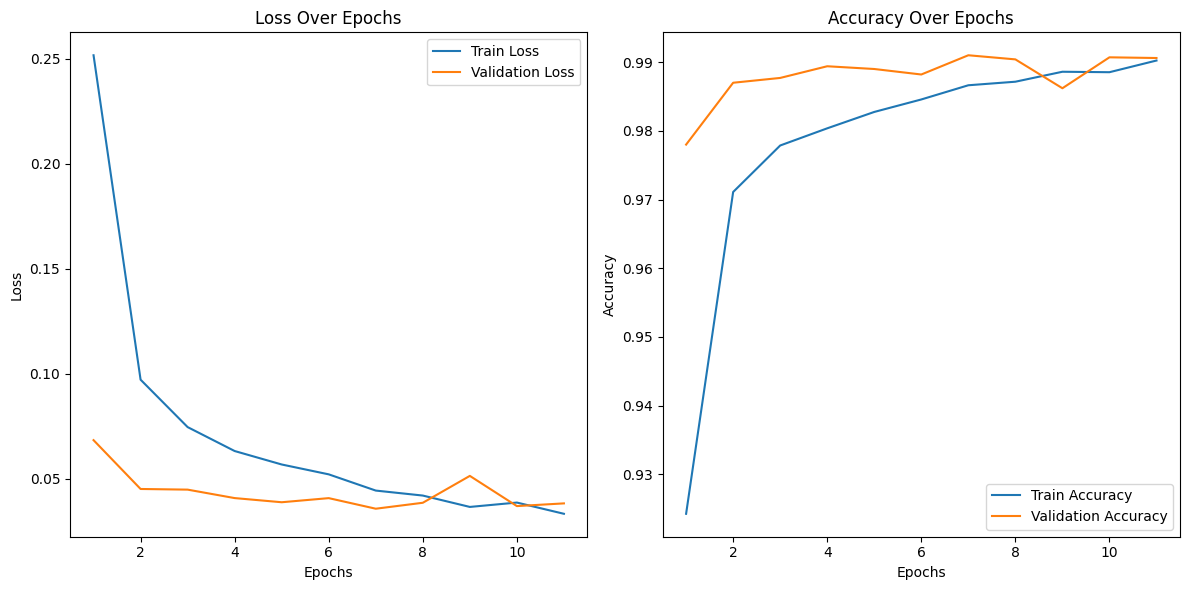

In [133]:

# 학습률 감소 콜백 설정
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)

# 모델 학습
history = model.fit(x_train, y_train, batch_size=64, epochs=11, validation_data=(x_test, y_test))
    # fit: 배치 크기 64로, 10회 반복 학습 수행
    # validation_data: 학습 과정 중 테스트 세트로 검증

    # 모델 학습
# history = model.fit(datagen.flow(x_train, y_train, batch_size=64),  # 데이터 증강을 사용한 모델 학습
#                     epochs=5,
#                     validation_data=(x_test, y_test),
#                     callbacks=[reduce_lr])

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test)              # 테스트 세트를 사용하여 모델 성능 평가
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)                            # 평가 결과 출력

# 손실 함수와 정확도 시각화
# 학습 과정에서 기록된 손실 및 정확도 값 추출
history_loss = history.history['loss']
history_accuracy = history.history['accuracy']
history_val_loss = history.history['val_loss']
history_val_accuracy = history.history['val_accuracy']

# 그래프 그리기
epochs = range(1, len(history_loss) + 1)

# 손실 함수 그래프
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_loss, label='Train Loss')
plt.plot(epochs, history_val_loss, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, history_accuracy, label='Train Accuracy')
plt.plot(epochs, history_val_accuracy, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


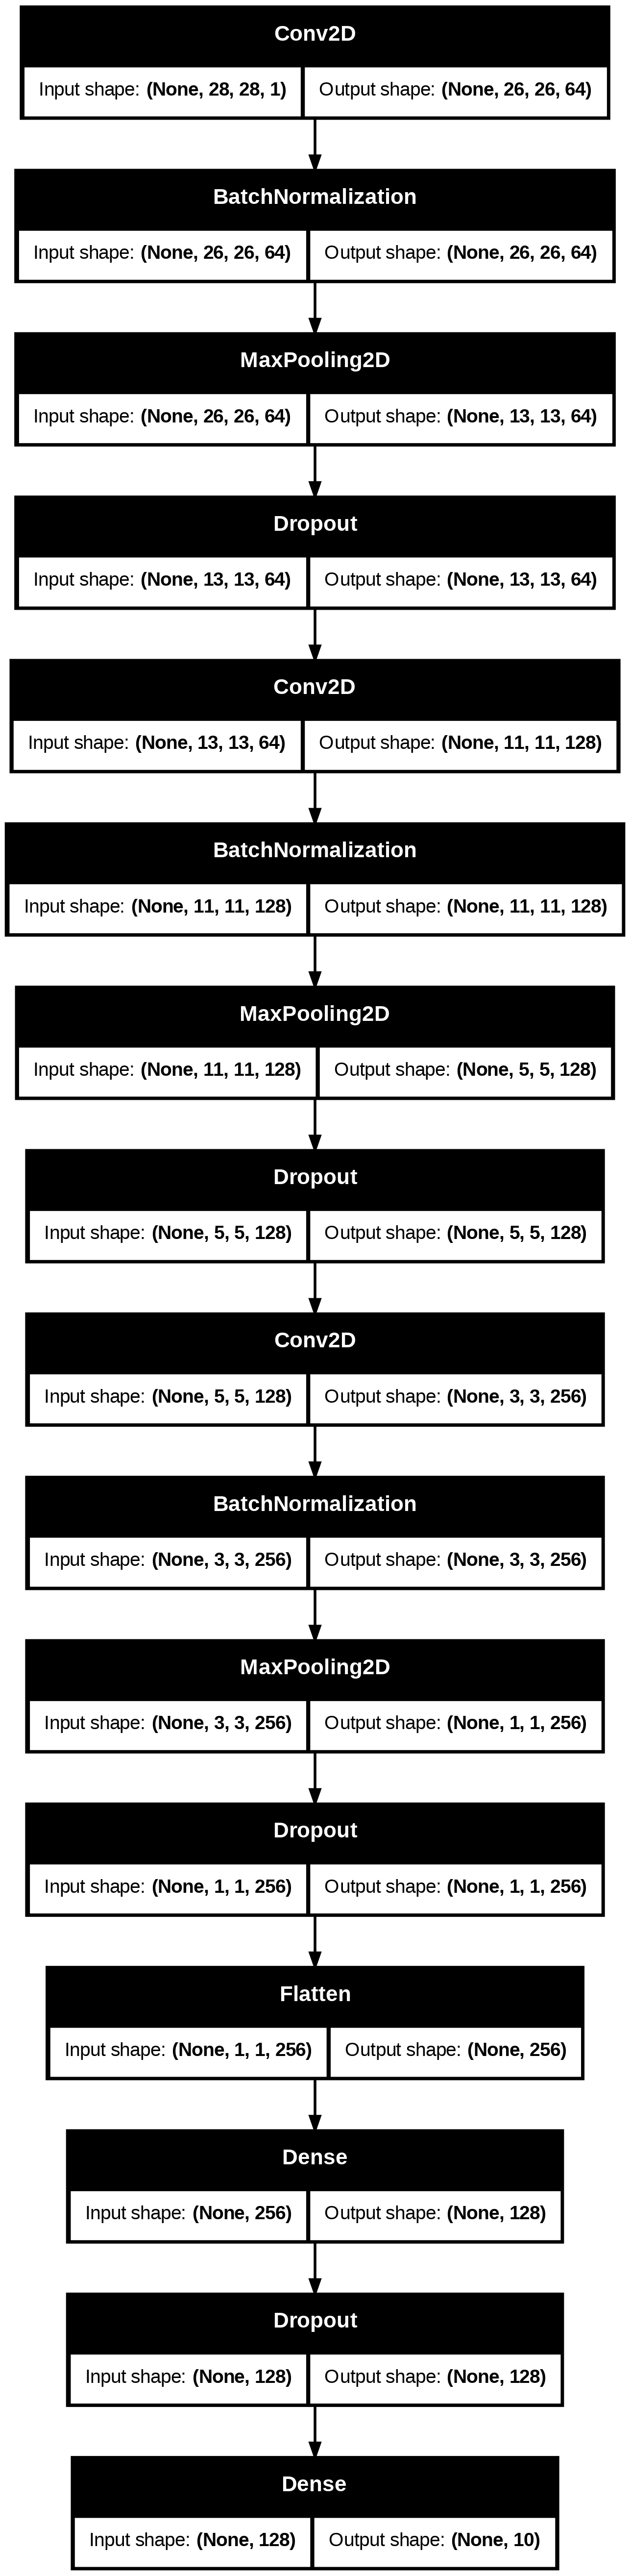

In [134]:
from keras import layers, models
from keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='pre_model.png')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


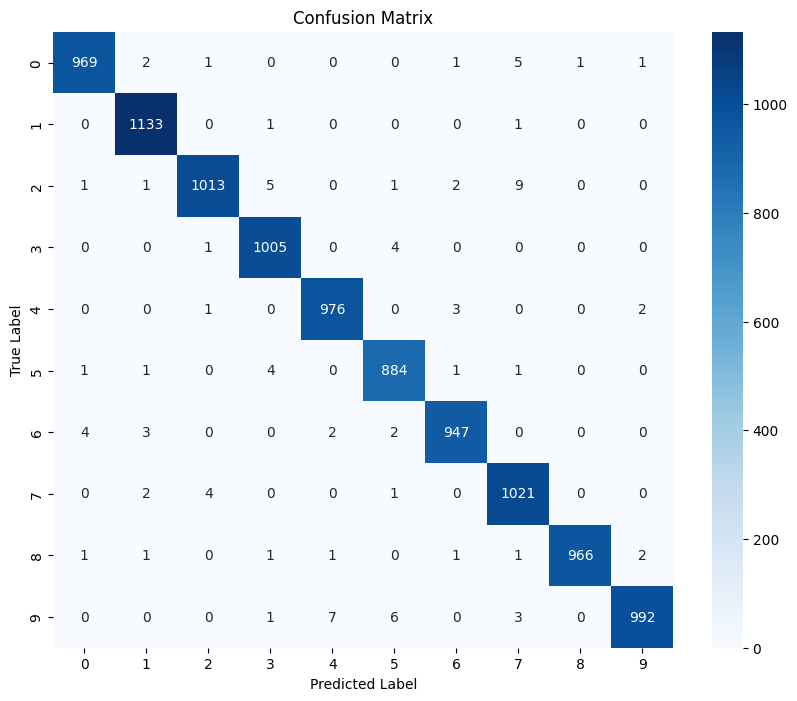


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [135]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 1. 혼동 행렬 시각화
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # 예측 클래스
y_true_classes = np.argmax(y_test, axis=1)  # 실제 클래스

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 2. 분류 보고서 출력
print("\nClassification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=class_names))

# 3. 학습률 변화 시각화
# 학습률 기록을 history에 저장하는 경우
if 'lr' in history.history:
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['lr'], label="Learning Rate")
    plt.xlabel('Epochs')
    plt.ylabel('Learning Rate')
    plt.title("Learning Rate Over Epochs")
    plt.legend()
    plt.show()
